In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from pathlib import Path
import os

In [ ]:
# mount google drive for images and return number of images
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/shuntimages2/'  

files = get_image_files('/content/gdrive/My Drive/shuntimages2')
len(files)

Mounted at /content/gdrive


638

Found 638 items
2 datasets of sizes 511,127
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (460, 460), 'method': 'squish', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': 224, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}
Setting-up type transforms pipelines
Found 638 items
2 datasets of sizes 511,127
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/gdrive/My Drive/shuntimages2/codmanhakim/cod

(4, 4)

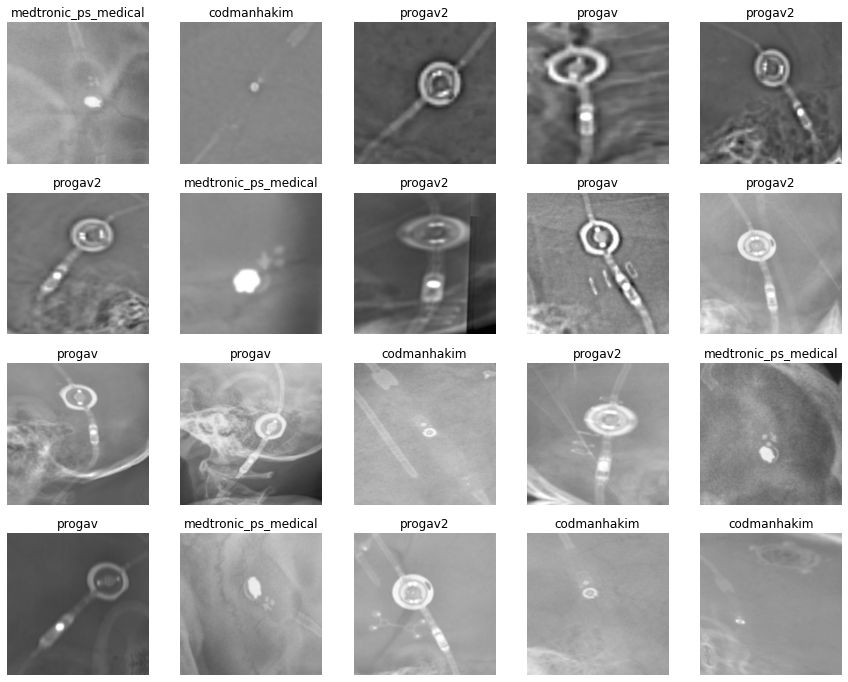

In [ ]:
#Setting up the Image Batch
imagepath = Path("/content/gdrive/My Drive/shuntimages2")

shunts = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\.*'),
                 item_tfms=Resize(460, method='squish'),
                 batch_tfms=[*aug_transforms(size=224)],
                 )
#print some debug information and print parts of the image batch
dls = shunts.dataloaders(imagepath, verbose=true, bs=32)
dls.show_batch(max_n = 20)
shunts.summary(imagepath)
print(dls.vocab)
len(dls.vocab),dls.c


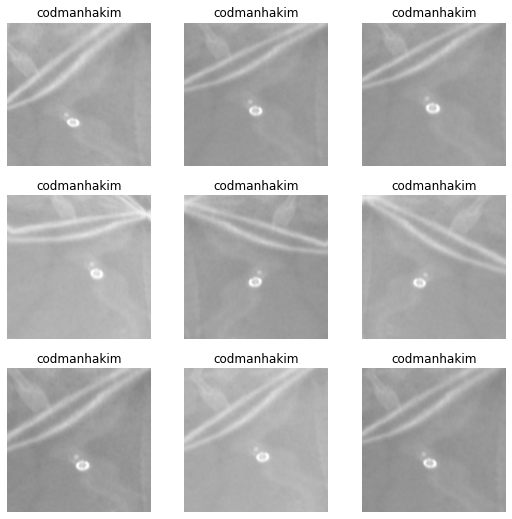

In [ ]:
dls.train.show_batch(unique=true)

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.0008317637839354575)

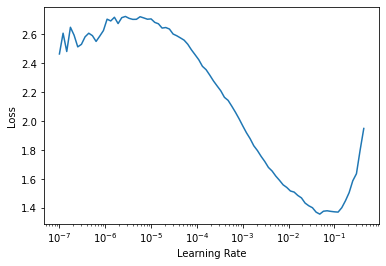

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.lr_find()

In [ ]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,time
0,1.240606,1.133717,0.716535,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.459020,0.356936,0.866142,00:09
1,0.397369,0.304038,0.937008,00:09
2,0.315092,0.184496,0.913386,00:09
3,0.255102,0.071934,0.960630,00:09
4,0.212522,0.043959,0.992126,00:09
5,0.172472,0.097897,0.984252,00:09
6,0.144096,0.134749,0.952756,00:09
7,0.134194,0.356958,0.929134,00:09
8,0.115320,0.092778,0.984252,00:09
9,0.103382,0.010316,0.992126,00:09


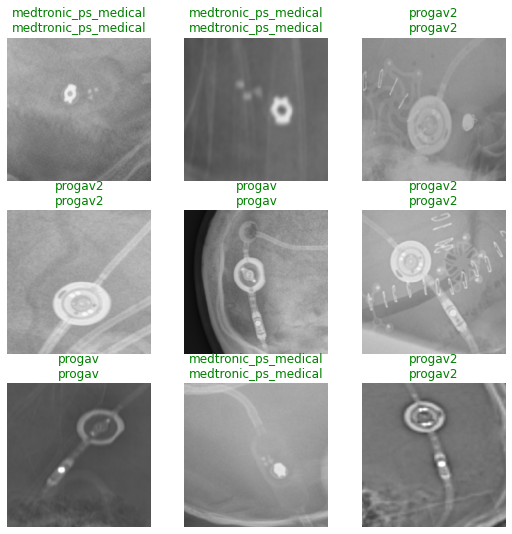

In [ ]:
learn.show_results()


                      precision    recall  f1-score   support

         codmanhakim       1.00      1.00      1.00        34
medtronic_ps_medical       1.00      1.00      1.00        27
              progav       1.00      0.96      0.98        24
             progav2       0.98      1.00      0.99        42

            accuracy                           0.99       127
           macro avg       0.99      0.99      0.99       127
        weighted avg       0.99      0.99      0.99       127



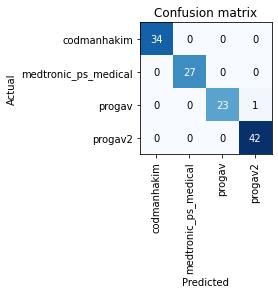

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.print_classification_report()


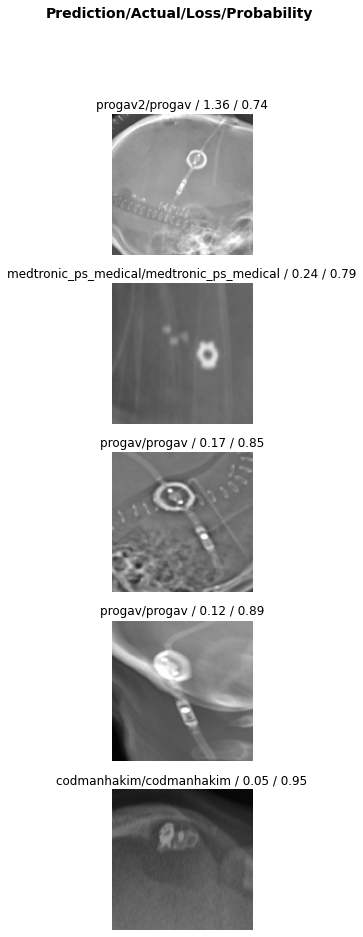

In [ ]:
interp.plot_top_losses(5, nrows=5)


In [1]:
#export the trained model and download the file as model.pkl to use for deployement on the server
learn.export()
learn.export(os.path.abspath('./model.pkl'))

#for debugging, can be deleted
path = Path()
print(path)
path.ls(file_exts='.pkl')
path.ls()

#download the model
from google.colab import files
files.download(path/'model.pkl')



NameError: ignored